In [1]:
#import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imread, imshow, subplots, show

from sklearn.metrics import confusion_matrix, RocCurveDisplay, classification_report, accuracy_score, classification_report
#rom sklearn.metrics import RocCurveDisplay

In [2]:
# Load the subset from the file
data = np.load('Tomato_balanced.npz')
X_train_balanced = data['X_train_balanced']
y_train_balanced = data['y_train_balanced']

In [3]:
# Load the subset from the file
data = np.load('Tomato_test.npz')
X_test = data['X_test']
y_test = data['y_test']

In [4]:
# Print the shape of the features to check
print(f"X_train_balanced shape: {X_train_balanced.shape}")
print(f"y_train_balanced shape: {y_train_balanced.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_balanced shape: (4252, 224, 224, 3)
y_train_balanced shape: (4252,)
X_test shape: (461, 224, 224, 3)
y_test shape: (461,)


In [5]:
X_test.shape

(461, 224, 224, 3)

In [6]:
img_shape = X_train_balanced.shape[1:]
img_shape

(224, 224, 3)

In [7]:
#Identify class distribution
unique_classes, class_counts = np.unique(y_train_balanced, return_counts=True)

dict(zip(unique_classes, class_counts))

{0: 450, 1: 450, 2: 632, 3: 716, 4: 654, 5: 450, 6: 450, 7: 450}

In [8]:
import tensorflow as tf
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [9]:
from tensorflow.keras.applications import MobileNet

base_model = tf.keras.applications.MobileNet(input_shape=img_shape,
                                             include_top=False,
                                             weights='imagenet')

In [10]:
base_model.trainable = False  # Freeze the base model weights

# Build a feature extraction model
feature_extractor = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D()
])


In [11]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [12]:
from sklearn.svm import SVC
#from sklearn.utils.class_weight import compute_class_weight

#class_weights = compute_class_weight('balanced', classes=np.unique(y_train_balanced), y=y_train_balanced)
#class_weight_dict = dict(zip(np.unique(y_train_balanced), class_weights))
svm_mobile = SVC(kernel='poly', probability=True, random_state=42) # class_weight=class_weight_dict

In [13]:
import time
start = time.time()

print("Extracting features from training data...")
X_train_features = feature_extractor.predict(X_train_balanced)
print("Fitting SVM...")
svm_mobile.fit(X_train_features, y_train_balanced)

end = time.time()
total_time = end - start

Extracting features from training data...
Fitting SVM...


In [14]:
print(f"Total time taken for fitting: {total_time:.2f} sec")

Total time taken for fitting: 21.48 sec


In [15]:
X_train_features

array([[1.527357  , 0.        , 0.30259314, ..., 0.        , 0.5909222 ,
        0.09952743],
       [1.2895427 , 0.0979825 , 0.52104086, ..., 0.        , 0.38914844,
        0.26711696],
       [1.3815823 , 0.        , 0.10973687, ..., 0.        , 1.1212239 ,
        0.        ],
       ...,
       [0.26672044, 0.20636   , 1.3481047 , ..., 0.02068372, 0.4116394 ,
        0.        ],
       [0.38883054, 0.3407574 , 0.4858486 , ..., 0.01768397, 0.60705584,
        0.02446567],
       [0.6954003 , 0.37110904, 0.8919364 , ..., 0.        , 0.0821008 ,
        0.        ]], dtype=float32)

In [16]:
# Extract features for the test data
print("Extracting features from test data...")
X_test_features = feature_extractor.predict(X_test)

Extracting features from test data...


In [17]:
# Print the shape of the features to check
print(f"X_train_features shape: {X_train_features.shape}")
print(f"X_test_features shape: {X_test_features.shape}")

X_train_features shape: (4252, 1024)
X_test_features shape: (461, 1024)


In [18]:
# Predict on the test set
y_pred = svm_mobile.predict(X_test_features)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 4, 0, 0, 0, 3, 1, 1, 7, 7, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 3, 4, 2, 2, 2, 2, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 7, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4,

In [19]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [20]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report, RocCurveDisplay, recall_score, f1_score
from sklearn.metrics import precision_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
precision_per_class = precision_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)


# Print metrics as percentages rounded to 2 decimal places
print(f"SVM Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Print precision and F1 score per class, rounded to 2 decimal places as percentages
print(f"Precision per Class: {[round(p * 100, 2) for p in precision_per_class]}%")
print(f"F1 Score per Class: {[round(f * 100, 2) for f in f1_per_class]}%")

SVM Test Accuracy: 88.50%
Precision: 88.34%
Recall: 88.50%
F1 Score: 88.13%
Precision per Class: [91.84, 88.24, 86.14, 90.48, 89.32, 94.74, 100.0, 76.74]%
F1 Score per Class: [90.91, 76.92, 90.16, 90.91, 92.93, 96.0, 76.92, 68.75]%


In [21]:
report = classification_report(y_test, y_pred)
    
print(report)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        50
           1       0.88      0.68      0.77        22
           2       0.86      0.95      0.90        92
           3       0.90      0.91      0.91       104
           4       0.89      0.97      0.93        95
           5       0.95      0.97      0.96        37
           6       1.00      0.62      0.77         8
           7       0.77      0.62      0.69        53

    accuracy                           0.89       461
   macro avg       0.90      0.83      0.85       461
weighted avg       0.88      0.89      0.88       461



In [22]:
class_labels = ['Early_blight','Healthy','Late_blight','Leaf_Miner',
                 'Magnesium_Deficiency','Nitrogen_Deficiency','Pottassium_Deficiency','Spotted_Wilt_Virus']
len(class_labels)

8

[[45  0  3  0  2  0  0  0]
 [ 0 15  0  4  0  0  0  3]
 [ 0  0 87  1  1  0  0  3]
 [ 1  1  0 95  3  0  0  4]
 [ 0  0  0  1 92  2  0  0]
 [ 0  1  0  0  0 36  0  0]
 [ 1  0  0  0  2  0  5  0]
 [ 2  0 11  4  3  0  0 33]]


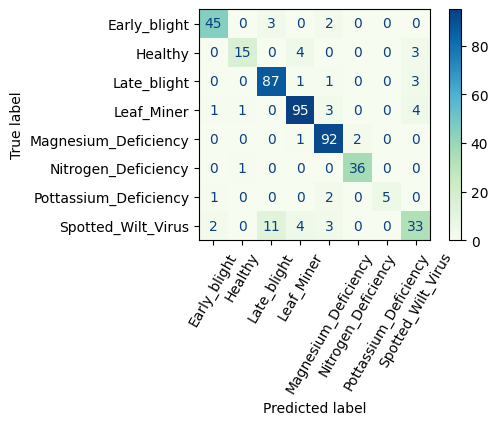

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)


display_cm = ConfusionMatrixDisplay(cm, display_labels=class_labels)
fig,ax = plt.subplots(figsize=(5,3))
display_cm.plot(cmap='GnBu', ax=ax, xticks_rotation=60)

In [24]:
import sklearn

y_pred_proba = svm_mobile.predict_proba(X_test_features)
sklearn.metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

0.9838844052711517

In [25]:
from tensorflow.keras.utils import to_categorical
y_test_cat = tf.keras.utils.to_categorical(y_test)
y_test_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

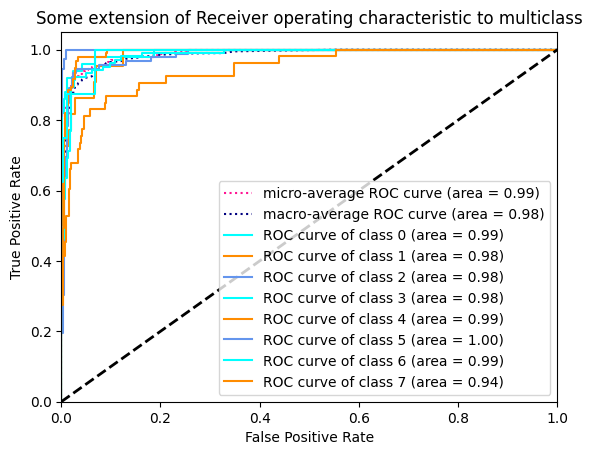

In [26]:
n_classes=8
 
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw=2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
from itertools import cycle
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])



##### Plot all ROC curves ######


plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle="dotted",
    linewidth=1.5,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="dotted",
    linewidth=1.5,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1.5,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [27]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.8611564142633897

In [28]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_proba)

0.3898671161814663

In [29]:
import pickle

with open('svm_mobile.pkl', 'wb') as model_file:
    pickle.dump(svm_mobile, model_file)

In [30]:
# Load the model from the file
with open('svm_mobile.pkl', 'rb') as model_file:
    svm_mobile = pickle.load(model_file)

In [31]:
# Save the subset to a file (you can use npz format or CSV for simplicity)
np.savez('M_SVM_test_Feature.npz', X_test_features=X_test_features, y_test=y_test)

In [32]:
# Load the subset from the file
data = np.load('M_SVM_test_Feature.npz')
X_test_features = data['X_test_features']
y_test = data['y_test']

In [33]:
# Predict on the test set
y_pred = svm_mobile.predict(X_test_features)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 4, 0, 0, 0, 3, 1, 1, 7, 7, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 3, 4, 2, 2, 2, 2, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 7, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4,

Extracting features from test data...


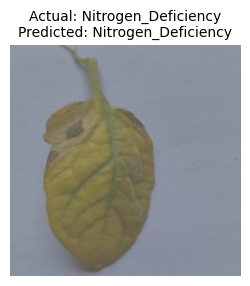

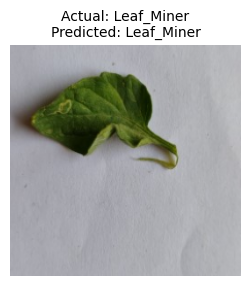

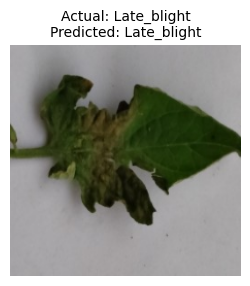

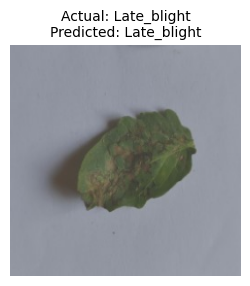

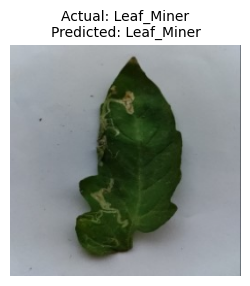

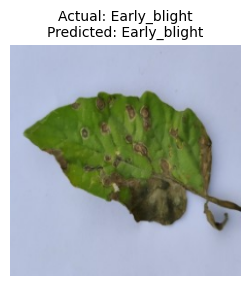

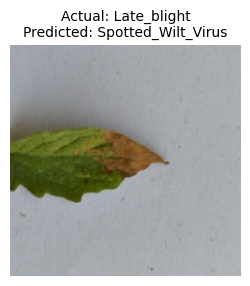

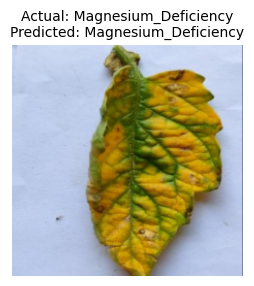

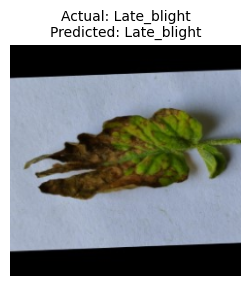

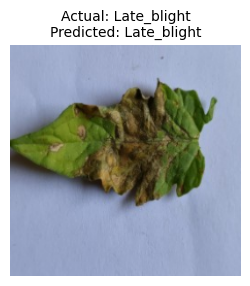

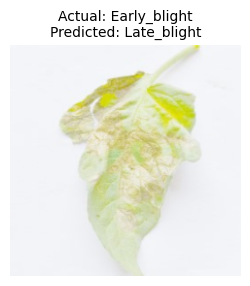

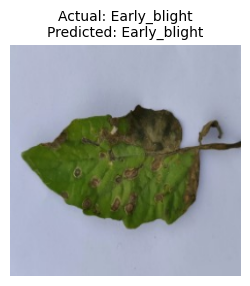

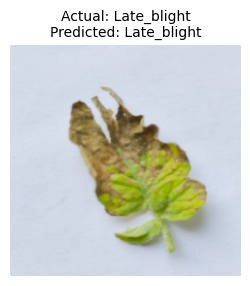

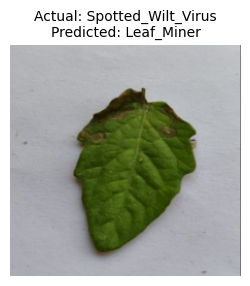

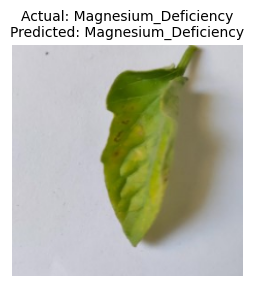

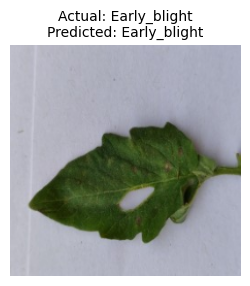

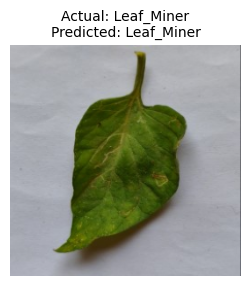

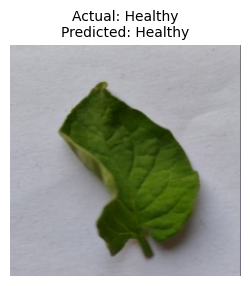

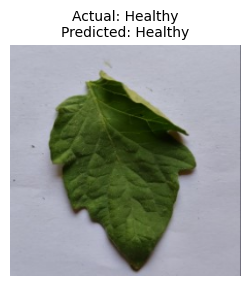

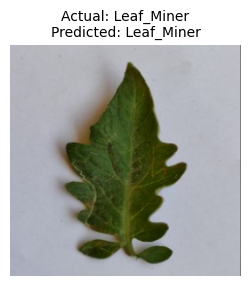

In [34]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Extract features for the test set using MobileNet feature extractor
print("Extracting features from test data...")
X_test_features = feature_extractor.predict(X_test)

# Predict the class labels for the test set using the trained SVM model
y_pred = svm_mobile.predict(X_test_features)

class_labels = ['Early_blight','Healthy','Late_blight','Leaf_Miner',
                 'Magnesium_Deficiency','Nitrogen_Deficiency','Pottassium_Deficiency','Spotted_Wilt_Virus']

# Select 20 random indices from the test set
random_indices = random.sample(range(len(X_test)), 20)

# Loop through the randomly selected indices
for index in random_indices:
    # Select the test image and its corresponding actual label
    test_image = X_test[index]
    actual_label_index = y_test[index]  # Assuming y_test contains the actual labels as indices

    # Get the predicted class label from the SVM prediction
    predicted_class_index = y_pred[index]

    # Get the actual and predicted class labels
    actual_label = class_labels[actual_label_index]
    predicted_label = class_labels[predicted_class_index]

    # Display the image with Matplotlib
    plt.figure(figsize=(3, 3))  # Set figure size

    # If the image is normalized, scale it back to the range [0, 255] for display
    if test_image.max() <= 1.0:
        display_image = test_image * 255  # Rescale to [0, 255]
    else:
        display_image = test_image  # If already in [0, 255], keep it as is

    # Display the image
    plt.imshow(display_image.astype('uint8'))  # Convert to uint8 for correct display
    plt.axis('off')  # Turn off axis
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=10)  # Add title
    plt.show()


In [35]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report, RocCurveDisplay, recall_score, f1_score
from sklearn.metrics import precision_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
precision_per_class = precision_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)


# Print metrics as percentages rounded to 2 decimal places
print(f"SVM Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Print precision and F1 score per class, rounded to 2 decimal places as percentages
print(f"Precision per Class: {[round(p * 100, 2) for p in precision_per_class]}%")
print(f"F1 Score per Class: {[round(f * 100, 2) for f in f1_per_class]}%")

SVM Test Accuracy: 88.50%
Precision: 88.34%
Recall: 88.50%
F1 Score: 88.13%
Precision per Class: [91.84, 88.24, 86.14, 90.48, 89.32, 94.74, 100.0, 76.74]%
F1 Score per Class: [90.91, 76.92, 90.16, 90.91, 92.93, 96.0, 76.92, 68.75]%
